# Project: Post Disaster Sentiment Analysis 
## Nick Giorgio & Leila Moinpour

### Research Questions: 
##### 1. How does public sentiment evolve over the course of a natural disaster and its recovery? 
##### 2. What emotions are most commonly expressed by affected communities in the aftermath of a disaster? (Timeline & Change in Sentiments on Social Media) 
##### 3. How does this compare between two different disaster types in the USA (2018 CA Wildfire or 2017 Texas Hurricane)? 
 

### Data: 
#### 1. Crisis NLP has data from wildfires including annotated tweets from 2018 California Wildfires and the 2017 Hurricanes in the USA.



In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Testing Sentiment function

In [2]:
sentence = TextBlob('So mad the fires have destroyed so many homes.))')
print(sentence.sentiment)

Sentiment(polarity=-0.0625, subjectivity=0.75)


## Loading Tweet Data from the Disaster Event

In [3]:
#data_cat = pd.read_csv('HumAID_data_all_combined/all_combined/all_train_categories.tsv', sep='\t')
#len(data_cat)

#### Pulled event data for Hurricane Harvey 2017 below

In [4]:
event_df = pd.read_csv('HumAID_data_events_set1_47K/events_set1/hurricane_harvey_2017/hurricane_harvey_2017_train.tsv', sep='\t')
len(event_df)

6378

In [5]:
print(len(event_df))            # Number of rows
print(event_df.columns)         # Column names
print(event_df.head())          # First 5 rows

6378
Index(['tweet_id', 'tweet_text', 'class_label'], dtype='object')
             tweet_id                                         tweet_text  \
0  903388763073720321  Hurricane Harvey killed at least 38 people, bu...   
1  901136425348759552  Harvey upped to Category 2 hurricane with 110+...   
2  902853707607535616  A huge shoutout @TexasGuard for all the work y...   
3  902859729701044224  Our thoughts and prayers are with the people h...   
4  901405975856414720  Homes destroyed on Broadway St in Rockport. Pe...   

                              class_label  
0                  injured_or_dead_people  
1              other_relevant_information  
2  rescue_volunteering_or_donation_effort  
3                    sympathy_and_support  
4       infrastructure_and_utility_damage  


## Going through each text column and calculating its sentiment score using Textblob

In [6]:
event_sentiment = []
for c in event_df['tweet_text']:
    event_sentiment.append(TextBlob(c).sentiment.polarity)

for i in range(20):
    print("Sentiment:", round(event_sentiment[i], 2), "Comment:", event_df['tweet_text'].iloc[i])

Sentiment: 0.0 Comment: Hurricane Harvey killed at least 38 people, but Charlie Hebdo mag says thats OK because they were neo-Nazis.
Sentiment: -0.1 Comment: Harvey upped to Category 2 hurricane with 110+ mph winds and flooding expected
Sentiment: 0.4 Comment: A huge shoutout @TexasGuard for all the work your #USArmy Soldiers are doing to help victims of #HurricaneHarvey #HelpForHouston
Sentiment: 0.0 Comment: Our thoughts and prayers are with the people hit by hurricane Harvey. If you know of a fellow maker who is in
Sentiment: 0.0 Comment: Homes destroyed on Broadway St in Rockport. People seen on street huddling &amp; hugging. #HurricaneHarvey #Texas
Sentiment: 0.46 Comment: @realDonaldTrump on top of the tremendous devastation &amp; flooding from Harvey; gutted EPA will not act on airborne petrochemical pollution !?
Sentiment: 0.0 Comment: UIL Statement Re: Displaced Student from Hurricane Harvey -  -- @steveat21 @vsa_texas @TXMileSplit @txrunning
Sentiment: 0.31 Comment: Calling a

#### Cleaning up the text in the "text" column of the wildfire DataFrame by removing links, usernames, hashtags, special characters, and extra spaces, and then saving the cleaned version in a new column called cleaned_text

In [7]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
event_df['cleaned_text'] = event_df['tweet_text'].apply(clean_text)

In [8]:
for i in range(20):
    print("Sentiment:", round(event_sentiment[i], 2), "Comment:", event_df['cleaned_text'].iloc[i])

Sentiment: 0.0 Comment: Hurricane Harvey killed at least 38 people but Charlie Hebdo mag says thats OK because they were neoNazis
Sentiment: -0.1 Comment: Harvey upped to Category 2 hurricane with 110 mph winds and flooding expected
Sentiment: 0.4 Comment: A huge shoutout for all the work your Soldiers are doing to help victims of
Sentiment: 0.0 Comment: Our thoughts and prayers are with the people hit by hurricane Harvey If you know of a fellow maker who is in
Sentiment: 0.0 Comment: Homes destroyed on Broadway St in Rockport People seen on street huddling amp hugging
Sentiment: 0.46 Comment: on top of the tremendous devastation amp flooding from Harvey gutted EPA will not act on airborne petrochemical pollution
Sentiment: 0.0 Comment: UIL Statement Re Displaced Student from Hurricane Harvey
Sentiment: 0.31 Comment: Calling all chefs Please join us in supporting the victims of Donate the proceeds of one featured dish RT
Sentiment: 0.03 Comment: In coastal areas both terrestrial floodi

## Cleaning data and filtering for english only

In [9]:
#pip install langdetect

In [10]:
import re
from langdetect import detect, LangDetectException

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

event_df = event_df[event_df['cleaned_text'].apply(is_english)].reset_index(drop=True)

## Checking new cleaned text column

In [11]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...


In [12]:
# event_df = event_df.drop(columns=['tweet_text'])
# do this if data is overloading server

In [62]:
event_df['class_label'].isna().any()

False

In [13]:
#add sentiment column to the dataframe
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
event_df['sentiment'] = event_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lmoin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027


In [15]:
#use this for crisis NLP's first data set which does not contain date column. Generate this from Tweet ID

import datetime

def tweet_id_to_datetime(tweet_id):
    # Twitter epoch: November 4, 2010 in milliseconds
    twitter_epoch = 1288834974657

    # Convert tweet ID to timestamp in milliseconds
    timestamp_ms = (int(tweet_id) >> 22) + twitter_epoch

    # Convert to datetime
    dt = datetime.datetime.utcfromtimestamp(timestamp_ms / 1000)
    return dt

tweet_id = 903388763073720321
print(tweet_id_to_datetime(tweet_id))

event_df['date'] = event_df['tweet_id'].apply(tweet_id_to_datetime)

2017-08-31 22:47:19.925000


In [16]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment,date
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845,2017-08-31 22:47:19.925
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000,2017-08-25 17:37:20.765
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019,2017-08-30 11:21:12.761
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000,2017-08-30 11:45:08.540
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027,2017-08-26 11:28:26.614


## Plotting sentiment change over time. Converterd the timestamp into year-month-date format

In [17]:
#lets group by month and assign to new df to understand why the data looked funky in plot
df_monthly = event_df.groupby(event_df['date'].dt.to_period('M'))['sentiment'].mean()
df_monthly.head()

date
2017-08    0.029091
2017-09    0.029206
Freq: M, Name: sentiment, dtype: float64

In [52]:
#this particular data set is only 8 days
earliest_date = event_df['date'].min()
latest_date = event_df['date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2017-08-25 00:00:01.923000
Latest date: 2017-09-01 23:59:46.094000


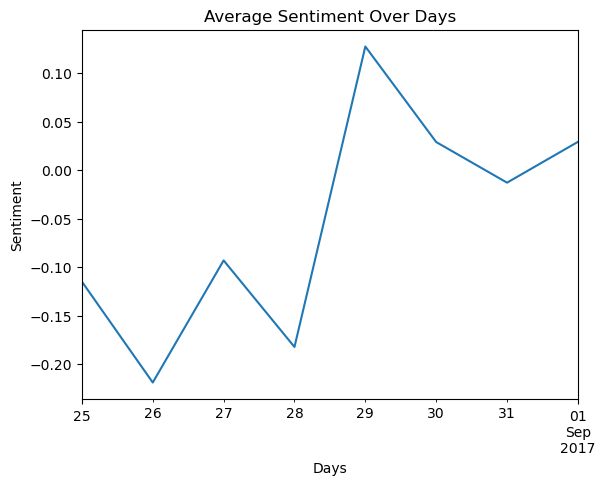

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#use this for Crisis NLP's second data set containing the timestamps as a column. 
#event_df['date'] = pd.to_datetime(event_df['timestamp'], unit='d', origin='1899-12-30')

event_df.groupby(event_df['date'].dt.to_period('D'))['sentiment'].mean().plot()
plt.title('Average Sentiment Over Days')
plt.ylabel('Sentiment')
plt.xlabel('Days')
plt.show()

In [19]:
print(event_df['sentiment'].describe())
#print(event_df['sentiment'].unique())

count    6323.000000
mean        0.029119
std         0.480755
min        -0.948500
25%        -0.381800
50%         0.000000
75%         0.440400
max         0.957100
Name: sentiment, dtype: float64


# Examining positive and negative sentiment tweets 

In [20]:
top_positive = event_df.sort_values(by='sentiment', ascending=False).head(10)
for i, row in top_positive.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: 0.96 | Text: Free Pizza Free shirt Free OKC zoo tickets chance to win an ipadamp your blood can help the Hurricane victims Help us make a difference
Sentiment: 0.95 | Text: Im Asking My NYC Friends To PLEASE Put Aside Gently Used Clothes 4 Hurricane Harvey Relief Efforts More Details 2 Come feeling hopeful
Sentiment: 0.94 | Text: We here at team Redneck want to help our Texas friends who need a hand Help us help them and get a cool shirt in the process
Sentiment: 0.94 | Text: Support the local relief efforts in Houston TX Be excellent to one another and help out by donating
Sentiment: 0.94 | Text: BIG thanks to Jerry Jones for the generous 100k relief donation We are so blessed by your partnership
Sentiment: 0.93 | Text: Thanks Good Morning America Happy to help any way we can Thanks for unifying us
Sentiment: 0.93 | Text: Petal Firefighters are heading to TX to help with relief efforts Join me in wishing them safe travels
Sentiment: 0.93 | Text: PLEASE READ if you wish to h

In [21]:
top_negative = event_df.sort_values(by='sentiment', ascending=True).head(10)
for i, row in top_negative.iterrows():
    print(f"Sentiment: {row['sentiment']:.2f} | Text: {row['cleaned_text']}")

Sentiment: -0.95 | Text: Stupid ass pic Katrina killed 1800 known for sure dead had no other option to survive
Sentiment: -0.94 | Text: Huston is dead ass fucked the dam broke a school is being held hostage by shooters and people are dieing because of hurricane Harvey
Sentiment: -0.94 | Text: Anyone who robs people during a crisis should be shot dead Stupid scum bags
Sentiment: -0.94 | Text: 730 am and i just broke down sobbing seeing these pictures of dogs trapped in the floods from hurricane harveyi am so heartbroken
Sentiment: -0.93 | Text: Hurricane Harvey churns deeper into Texas but loses force at least one dead but full scope of damage unknown
Sentiment: -0.93 | Text: New this morning More than 18thousand evacuees from Hurricane Harvey in Texas this morning with 9 killed Many missing and feared dead
Sentiment: -0.93 | Text: This is a long time for the shoe to drop in Sept 1900 a devastating hurricaneflood destroyed Galveston amp killed at least 6000 people
Sentiment: -0.93 | Tex

# @Nick the code is new below

In [58]:
event_df['class_label'].value_counts()

class_label
rescue_volunteering_or_donation_effort    1968
other_relevant_information                1219
infrastructure_and_utility_damage          845
injured_or_dead_people                     487
displaced_people_and_evacuations           476
sympathy_and_support                       440
caution_and_advice                         376
not_humanitarian                           285
requests_or_urgent_needs                   227
Name: count, dtype: int64

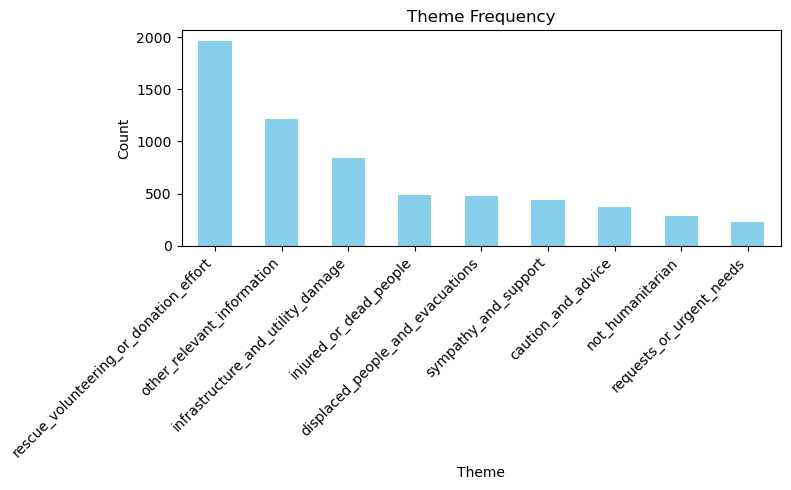

In [61]:
import matplotlib.pyplot as plt

# Count values in the column
counts = event_df['class_label'].value_counts()

# Plot as a bar chart
counts.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Theme Frequency')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the Sentiment Groups

In [22]:
import seaborn as sns

<Axes: ylabel='Count'>

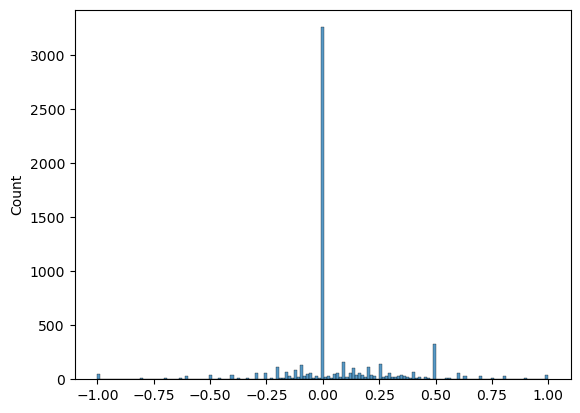

In [23]:
sns.histplot(event_sentiment)

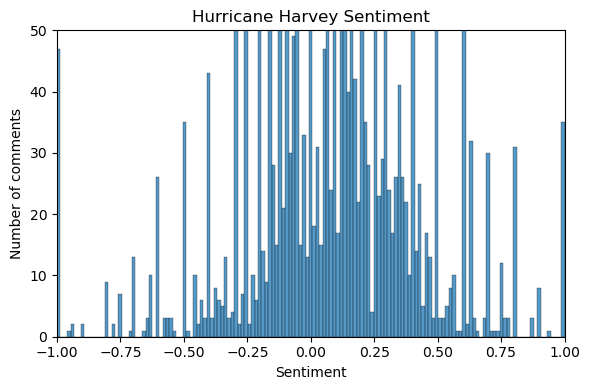

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # single subplot

sns.histplot(event_sentiment, ax=ax)

ax.set_title('Hurricane Harvey Sentiment')
ax.set_ylim(0, 50)
ax.set_xlim(-1, 1)
ax.set_ylabel('Number of comments')
ax.set_xlabel('Sentiment')

fig.tight_layout()
plt.show()

# Topic Modeling

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

swords = stopwords.words('english')
# Apply tokenization and stopword removal to each row in the column
event_df['bag_o_words'] = event_df['cleaned_text'].apply(
    lambda cap: [word for word in word_tokenize(cap.lower()) if word not in swords and word.isalpha()]
)

In [26]:
event_df.head()

,tweet_id,tweet_text,class_label,cleaned_text,sentiment,date,bag_o_words
0,903388763073720321,"Hurricane Harvey killed at least 38 people, bu...",injured_or_dead_people,Hurricane Harvey killed at least 38 people but...,0.2845,2017-08-31 22:47:19.925,"[hurricane, harvey, killed, least, people, cha..."
1,901136425348759552,Harvey upped to Category 2 hurricane with 110+...,other_relevant_information,Harvey upped to Category 2 hurricane with 110 ...,0.0000,2017-08-25 17:37:20.765,"[harvey, upped, category, hurricane, mph, wind..."
2,902853707607535616,A huge shoutout @TexasGuard for all the work y...,rescue_volunteering_or_donation_effort,A huge shoutout for all the work your Soldiers...,0.4019,2017-08-30 11:21:12.761,"[huge, shoutout, work, soldiers, help, victims]"
3,902859729701044224,Our thoughts and prayers are with the people h...,sympathy_and_support,Our thoughts and prayers are with the people h...,0.0000,2017-08-30 11:45:08.540,"[thoughts, prayers, people, hit, hurricane, ha..."
4,901405975856414720,Homes destroyed on Broadway St in Rockport. Pe...,infrastructure_and_utility_damage,Homes destroyed on Broadway St in Rockport Peo...,-0.1027,2017-08-26 11:28:26.614,"[homes, destroyed, broadway, st, rockport, peo..."


In [27]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
#help(gensim.models.LdaMulticore)

In [28]:
wordlists = event_df['bag_o_words'].tolist()

# 1. Create the dictionary
dictionary = gensim.corpora.Dictionary(wordlists)

# 2. Filter rare and common tokens (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 3. Create the corpus (Bag-of-Words format)
corpus = [dictionary.doc2bow(text) for text in wordlists]

# 4. Fit the LDA model
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5)

# 5. Print topics
for idx, topic in model.print_topics(num_words=8):
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.066*"harvey" + 0.064*"hurricane" + 0.023*"help" + 0.018*"houston" + 0.014*"affected" + 0.014*"relief" + 0.012*"amp" + 0.012*"flooding"
Topic #2: 0.028*"harvey" + 0.027*"help" + 0.025*"hurricane" + 0.020*"flooding" + 0.019*"texas" + 0.019*"need" + 0.016*"houston" + 0.015*"relief"
Topic #3: 0.039*"harvey" + 0.037*"hurricane" + 0.026*"texas" + 0.017*"damage" + 0.014*"donate" + 0.013*"relief" + 0.011*"flooding" + 0.010*"help"
Topic #4: 0.028*"damage" + 0.024*"amp" + 0.023*"hurricane" + 0.023*"harvey" + 0.014*"flooding" + 0.013*"homes" + 0.013*"texas" + 0.012*"people"
Topic #5: 0.020*"harvey" + 0.020*"help" + 0.018*"water" + 0.016*"hurricane" + 0.016*"houston" + 0.015*"texas" + 0.014*"rt" + 0.014*"flood"


In [48]:
# Find the index of the first row where 'amp' appears in the list
idx = event_df[event_df['bag_o_words'].apply(lambda x: 'amp' in x)].index[0]

# Optionally, show that row
print(event_df.loc[idx])
print(event_df.loc[idx, 'bag_o_words'])  # full token list
print(event_df.loc[idx, 'tweet_text'])  # full tweet text

tweet_id                                       901405975856414720
tweet_text      Homes destroyed on Broadway St in Rockport. Pe...
class_label                     infrastructure_and_utility_damage
cleaned_text    Homes destroyed on Broadway St in Rockport Peo...
sentiment                                                 -0.1027
date                                   2017-08-26 11:28:26.614000
bag_o_words     [homes, destroyed, broadway, st, rockport, peo...
Name: 4, dtype: object
['homes', 'destroyed', 'broadway', 'st', 'rockport', 'people', 'seen', 'street', 'huddling', 'amp', 'hugging']
Homes destroyed on Broadway St in Rockport. People seen on street huddling &amp; hugging. #HurricaneHarvey #Texas


In [53]:
words_to_exclude = ['texas','houston','harvey','hurricane', 'rt', 'amp', 'hurricaneharvey', 'w']

wordlists = [
    [word for word in doc if word not in words_to_exclude]
    for doc in event_df['bag_o_words']
]

In [54]:
# 1. Create the dictionary
dictionary = gensim.corpora.Dictionary(wordlists)

# 2. Filter rare and common tokens (optional but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 3. Create the corpus (Bag-of-Words format)
corpus = [dictionary.doc2bow(text) for text in wordlists]

# 4. Fit the LDA model
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=5)

# 5. Print topics
for idx, topic in model.print_topics(num_words=8):
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.022*"water" + 0.017*"flooding" + 0.012*"flood" + 0.010*"floods" + 0.009*"tx" + 0.008*"people" + 0.008*"tornado" + 0.007*"affected"
Topic #2: 0.026*"help" + 0.020*"damage" + 0.014*"need" + 0.014*"people" + 0.013*"victims" + 0.010*"flooding" + 0.007*"tx" + 0.007*"homes"
Topic #3: 0.027*"help" + 0.022*"damage" + 0.015*"victims" + 0.014*"flooding" + 0.014*"donate" + 0.013*"relief" + 0.011*"need" + 0.010*"donations"
Topic #4: 0.026*"help" + 0.017*"relief" + 0.015*"please" + 0.015*"toll" + 0.014*"death" + 0.011*"flooding" + 0.010*"people" + 0.009*"floods"
Topic #5: 0.025*"affected" + 0.022*"flooding" + 0.017*"relief" + 0.013*"homes" + 0.011*"help" + 0.010*"victims" + 0.008*"damage" + 0.008*"due"


In [56]:
import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.049891  0.023342       1        1  23.747881
3     -0.006630  0.021180       2        1  20.961950
1      0.012024  0.036163       3        1  19.436254
4      0.027348 -0.073888       4        1  18.119728
0     -0.082634 -0.006797       5        1  17.734187, topic_info=          Term        Freq       Total Category  logprob  loglift
146   affected  366.000000  366.000000  Default  30.0000  30.0000
310      death  213.000000  213.000000  Default  29.0000  29.0000
312       toll  219.000000  219.000000  Default  28.0000  28.0000
11        help  820.000000  820.000000  Default  27.0000  27.0000
136     damage  520.000000  520.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
485     rescue   31.001177  155.760489   Topic5  -5.4589   0.1154
11        help   42.850071  820.878215   Topic5  -5.1352  -1.2230
130    shelter   31.798100  222.608825   Topic5  -5.4335  -0.2163
30   displaced   28.239386  137.546350   Topic5  -5.5522   0.1464
175     relief   30.708521  472.268730   Topic5  -5.4684  -1.0033

[401 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1419      2  0.133964  according
1419      3  0.535854  according
1419      4  0.133964  according
1595      2  0.159571      adopt
1595      4  0.159571      adopt
...     ...       ...        ...
501       2  0.159224      worry
501       4  0.159224      worry
501       5  0.636895      worry
1059      1  0.688951      wrong
1059      5  0.172238      wrong

[1103 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 1])